In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import datetime as dt

# Import Data

In [52]:
raw_data = pd.read_csv('dataset/online_retail.csv')


In [15]:
raw_data

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Data Cleaning

In [16]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [18]:
# Check for missing value (NaN)
raw_data.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [31]:
# Remove rows where CustomerID is NaN
df_clean = raw_data.dropna(subset=['CustomerID'])

In [33]:
df_clean.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [63]:
# Change to Date Time format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Change column into string
df_clean['CustomerID'] = df_clean['CustomerID'].astype(str)

# Extract year and month and create a new column in "year_month" format
df_clean['year_month'] = df_clean['InvoiceDate'].dt.to_period('M')

# Slice the data for years greater than 2010
df_clean = df_clean[df_clean['InvoiceDate'].dt.year > 2010]

# Delete outlier
# from scipy import stats
# df_clean = df_clean[(np.abs(stats.zscore(df_clean[['quantity','amount']]))<3).all(axis=1)]
# df_clean = df_clean.reset_index(drop=True)

df_clean

/var/folders/nr/p6b7qgnd5ync988bnbxs4kg40000gn/T/ipykernel_33356/2811890451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
/var/folders/nr/p6b7qgnd5ync988bnbxs4kg40000gn/T/ipykernel_33356/2811890451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CustomerID'] = df_clean['CustomerID'].astype(str)
/var/folders/nr/p6b7qgnd5ync988bnbxs4kg40000gn/T/ipykernel_33356/2811890451.py:8: SettingWithCopyWarning: 
A value is trying to be

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year_month
42481,42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313,United Kingdom,2011-01
42482,42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01
42483,42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313,United Kingdom,2011-01
42484,42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313,United Kingdom,2011-01
42485,42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313,United Kingdom,2011-01
...,...,...,...,...,...,...,...,...,...,...
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12


In [43]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        406829 non-null  int64         
 1   InvoiceNo    406829 non-null  object        
 2   StockCode    406829 non-null  object        
 3   Description  406829 non-null  object        
 4   Quantity     406829 non-null  int64         
 5   InvoiceDate  406829 non-null  datetime64[ns]
 6   UnitPrice    406829 non-null  float64       
 7   CustomerID   406829 non-null  object        
 8   Country      406829 non-null  object        
 9   year_month   406829 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(2), object(5), period[M](1)
memory usage: 34.1+ MB


# Creating Cohort Analysis

#### Aggregate data transaction into summary of sum of order for each customer every month

In [64]:
df_user_monthly = df_clean.groupby(['CustomerID','year_month'], as_index=False).agg(order_count=('InvoiceNo','nunique'))
df_user_monthly

,CustomerID,year_month,order_count
0,12346,2011-01,2
1,12347,2011-01,1
2,12347,2011-04,1
3,12347,2011-06,1
4,12347,2011-08,1
...,...,...,...
12722,18283,2011-10,1
12723,18283,2011-11,4
12724,18283,2011-12,1
12725,18287,2011-05,1


#### Create a column as the cohort of the user, for example, the cohort of the month of their first transaction.

In [65]:
df_user_monthly['cohort'] = df_user_monthly.groupby('CustomerID')['year_month'].transform('min')
df_user_monthly

,CustomerID,year_month,order_count,cohort
0,12346,2011-01,2,2011-01
1,12347,2011-01,1,2011-01
2,12347,2011-04,1,2011-01
3,12347,2011-06,1,2011-01
4,12347,2011-08,1,2011-01
...,...,...,...,...
12722,18283,2011-10,1,2011-01
12723,18283,2011-11,4,2011-01
12724,18283,2011-12,1,2011-01
12725,18287,2011-05,1,2011-05


#### Calculate the month distance between the transaction month and the first transaction month, then add 1 so that a month distance of 0 becomes 1, which means the first month,

In [66]:
from operator import attrgetter

df_user_monthly['month_distance'] = (df_user_monthly['year_month'] - df_user_monthly['cohort']).apply(attrgetter('n')) + 1
df_user_monthly

,CustomerID,year_month,order_count,cohort,month_distance
0,12346,2011-01,2,2011-01,1
1,12347,2011-01,1,2011-01,1
2,12347,2011-04,1,2011-01,4
3,12347,2011-06,1,2011-01,6
4,12347,2011-08,1,2011-01,8
...,...,...,...,...,...
12722,18283,2011-10,1,2011-01,10
12723,18283,2011-11,4,2011-01,11
12724,18283,2011-12,1,2011-01,12
12725,18287,2011-05,1,2011-05,1


#### Create pivot table with cohort as its index, month distance as its column, and the sum of unique customer as its value

In [67]:
df_cohort_pivot = pd.pivot_table(df_user_monthly, index='cohort', columns='month_distance', values='CustomerID', aggfunc=pd.Series.nunique)
df_cohort_pivot

month_distance,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2011-01,783.0,299.0,346.0,305.0,359.0,339.0,314.0,311.0,347.0,340.0,413.0,224.0
2011-02,499.0,144.0,125.0,169.0,158.0,139.0,152.0,169.0,157.0,184.0,74.0,NaN
2011-03,530.0,109.0,144.0,128.0,123.0,104.0,151.0,131.0,165.0,57.0,NaN,NaN
2011-04,360.0,90.0,90.0,86.0,78.0,88.0,90.0,105.0,33.0,NaN,NaN,NaN
2011-05,317.0,73.0,57.0,58.0,73.0,80.0,87.0,34.0,NaN,NaN,NaN,NaN
2011-06,263.0,56.0,48.0,67.0,63.0,89.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-07,218.0,45.0,47.0,53.0,58.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,184.0,47.0,47.0,48.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,313.0,93.0,104.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Take the first column values as cohort size
cohort_size = df_cohort_pivot.iloc[:, 0]
cohort_size

cohort
2011-01    783.0
2011-02    499.0
2011-03    530.0
2011-04    360.0
2011-05    317.0
2011-06    263.0
2011-07    218.0
2011-08    184.0
2011-09    313.0
2011-10    371.0
2011-11    359.0
2011-12     47.0
Freq: M, Name: 1, dtype: float64

#### Devide all the pivot table values with cohort size

In [73]:
df_retention_cohort = df_cohort_pivot.divide(cohort_size, axis=0)
df_retention_cohort


month_distance,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2011-01,1.0,0.381865,0.441890,0.389527,0.458493,0.432950,0.401022,0.397190,0.443167,0.434227,0.527458,0.286079
2011-02,1.0,0.288577,0.250501,0.338677,0.316633,0.278557,0.304609,0.338677,0.314629,0.368737,0.148297,NaN
2011-03,1.0,0.205660,0.271698,0.241509,0.232075,0.196226,0.284906,0.247170,0.311321,0.107547,NaN,NaN
2011-04,1.0,0.250000,0.250000,0.238889,0.216667,0.244444,0.250000,0.291667,0.091667,NaN,NaN,NaN
2011-05,1.0,0.230284,0.179811,0.182965,0.230284,0.252366,0.274448,0.107256,NaN,NaN,NaN,NaN
2011-06,1.0,0.212928,0.182510,0.254753,0.239544,0.338403,0.102662,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.206422,0.215596,0.243119,0.266055,0.137615,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.255435,0.255435,0.260870,0.146739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09,1.0,0.297125,0.332268,0.124601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualize the pivot table with retention rate value with heatmap

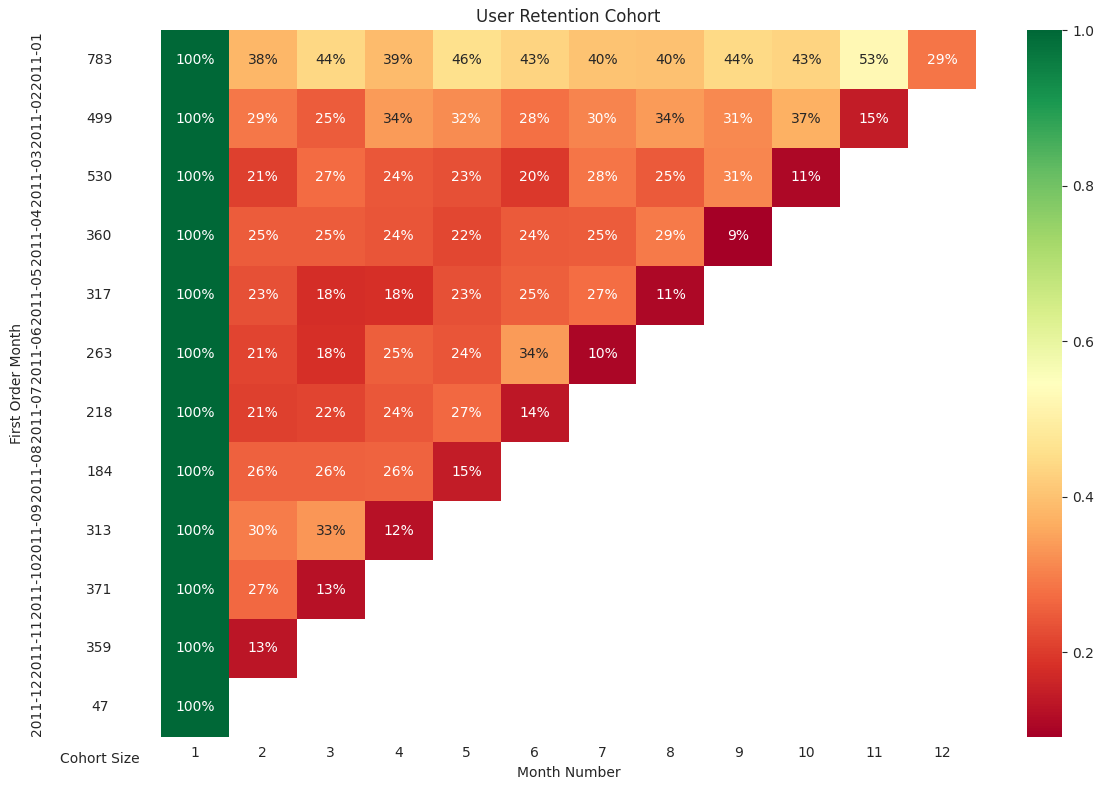

In [72]:
with sns.axes_style('white'):

    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios':[1, 11]})

    # user retention cohort
    sns.heatmap(df_retention_cohort, annot=True, fmt='.0%', cmap='RdYlGn', ax=ax[1])
    ax[1].set_title('User Retention Cohort')
    ax[1].set(xlabel='Month Number', ylabel='')

    # cohort size
    df_cohort_size = pd.DataFrame(cohort_size)
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(df_cohort_size, annot=True, cbar=False, fmt='g', cmap=white_cmap, ax=ax[0])
    ax[0].tick_params(bottom=False)
    ax[0].set(xlabel='Cohort Size', ylabel='First Order Month', xticklabels=[])

    fig.tight_layout()

# Summary

- The larget number of new customer (first time buyer) happen in January with total of 783 new customer

- Month with the most loyal customer is January with 38% average customer retention rate 

- Unfortunately most of the customer did not coming back to the store as the retention rate is below 50%


##### To increase the retention rate here are some plan that can be considered :

- Run customer survey about their experience at the store, what they like and dislike the most, Hygine of the store, etc.

- Make customer member card that have a lot benefits

- Make regular event that make customer intrested